In [5]:
from numpy import exp
from math import sqrt
import numpy as np
from numpy import random
from math import pi
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import norm

from function_memoire import *

IndentationError: expected an indented block (function_memoire.py, line 54)

# Mémoire NCE-GAN

# I ) NCE for a 1D distribution

Data $X \sim  N(m,s)$

Noise $Y \sim  Q = \mu +\sigma N(0,1)$ with $\mu, \sigma$ fixed (in the code it is fixed at mu_unit and sigma_init)

## Lets experiment NCE with different values of $\mu_{data}, \sigma_{data} , \mu_{noise}, \sigma_{noise}$ 

### Cas 1 : Loi du bruit très distincte de l'échantillon:

In [147]:
mupo = 12
sigmapo = 1
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))


grad=NCEDescent1D(x_batches, mupo, sigmapo,mu_init = 24, sigma_init=4, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 300, nu =1)    
print("constant estimate",grad.cte)
print(" nbre d'itérations", len(grad.ctes))

true constant value 0.3989422804014327
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>
CTE3===== 4.600632
CTE3===== 4.2044716
CTE3===== 3.83214
CTE3===== 3.487329
CTE3===== 3.1570566
CTE3===== 2.8042152
CTE3===== 2.4421577
CTE3===== 2.0711179
CTE3===== 1.7130673
CTE3===== 1.367745
CTE3===== 1.0322324
CTE3===== 0.72371036
CTE3===== 0.484937
CTE3===== 0.22298434
CTE3===== 0.069609895
CTE3===== 0.2501098
CTE3===== 0.42510903
CTE3===== 0.58838224
CTE3===== 0.7230407
CTE3===== 0.83519506
CTE3===== 0.93601334
CTE3===== 1.0229125
CTE3===== 1.0963492
CTE3===== 1.1518095
CTE3===== 1.2002853
CTE3===== 1.2441038
CTE3===== 1.2791468
CTE3===== 1.3058647
CTE3===== 1.3312422
CTE3===== 1.3508613
CTE3===== 1.3720224
CTE3===== 1.3887389
CTE3===== 1.4013531
CTE3===== 1.4056313
CTE3===== 1.4026899
CTE3===== 1.3925053
CTE3===== 1.3815492
CTE3===== 1.3692931
CTE3===== 1.3561262
CTE3===== 1.3391665
CTE3===== 1.3262502
CTE3===== 1.3111738
CTE3===== 1.2879592
CTE3===== 1.2655926
CTE3===== 1.244898

CTE3===== 0.51520693
CTE3===== 0.5506159
CTE3===== 0.5830102
CTE3===== 0.5856075
CTE3===== 0.5557337
CTE3===== 0.5334847
CTE3===== 0.51874274
CTE3===== 0.48494685
CTE3===== 0.40462577
CTE3===== 0.33537117
CTE3===== 0.22819217
CTE3===== 0.15559712
CTE3===== 0.29111284
CTE3===== 0.4379199
CTE3===== 0.580074
CTE3===== 0.6912028
CTE3===== 0.79618824
CTE3===== 0.8747312
CTE3===== 0.9394145
CTE3===== 0.98622173
CTE3===== 1.0327816
CTE3===== 1.0604091
CTE3===== 1.0914339
CTE3===== 1.1115028
CTE3===== 1.1046487
CTE3===== 1.0957294
CTE3===== 1.0595504
CTE3===== 1.0124239
CTE3===== 0.95649314
CTE3===== 0.90844494
CTE3===== 0.87012047
CTE3===== 0.8212382
CTE3===== 0.75120384
CTE3===== 0.6654924
CTE3===== 0.5533432
CTE3===== 0.47303522
CTE3===== 0.41415235
CTE3===== 0.3805619
CTE3===== 0.38232803
CTE3===== 0.37233645
CTE3===== 0.38632765
CTE3===== 0.4163056
CTE3===== 0.4222901
CTE3===== 0.39819393
CTE3===== 0.34359223
CTE3===== 0.34421682
CTE3===== 0.3282506
CTE3===== 0.28066093
CTE3===== 0.238534

CTE3===== 0.7612948
CTE3===== 0.7210951
CTE3===== 0.6643849
CTE3===== 0.5795473
CTE3===== 0.49813318
CTE3===== 0.42073035
CTE3===== 0.34608746
CTE3===== 0.25256664
CTE3===== 0.22512668
CTE3===== 0.26126814
CTE3===== 0.35757664
CTE3===== 0.44095206
CTE3===== 0.5054023
CTE3===== 0.58120054
CTE3===== 0.64194787
CTE3===== 0.7056537
CTE3===== 0.74986833
CTE3===== 0.78097475
CTE3===== 0.80013305
CTE3===== 0.80635273
CTE3===== 0.79479855
CTE3===== 0.72869885
CTE3===== 0.6607201
CTE3===== 0.5986772
CTE3===== 0.52484035
CTE3===== 0.43590277
CTE3===== 0.37096485
CTE3===== 0.24912338
CTE3===== 0.19446084
CTE3===== 0.19600935
CTE3===== 0.31289637
CTE3===== 0.41426358
CTE3===== 0.5110542
CTE3===== 0.6012196
CTE3===== 0.64112383
CTE3===== 0.6763553
CTE3===== 0.6946667
CTE3===== 0.70507747
CTE3===== 0.718302
CTE3===== 0.7342999
CTE3===== 0.75405186
CTE3===== 0.7485965
CTE3===== 0.7313257
CTE3===== 0.71053076
CTE3===== 0.67834395
CTE3===== 0.6280226
CTE3===== 0.57302815
CTE3===== 0.5286614
CTE3===== 0

CTE3===== 0.5004894
CTE3===== 0.43670237
CTE3===== 0.35903564
CTE3===== 0.28670955
CTE3===== 0.2617156
CTE3===== 0.32284996
CTE3===== 0.37215787
CTE3===== 0.43122348
CTE3===== 0.47213778
CTE3===== 0.46724382
CTE3===== 0.44268215
CTE3===== 0.42466444
CTE3===== 0.36089873
CTE3===== 0.31313476
CTE3===== 0.30753735
CTE3===== 0.316849
CTE3===== 0.3207333
CTE3===== 0.2974577
CTE3===== 0.32582483
CTE3===== 0.36898574
CTE3===== 0.37526852
CTE3===== 0.3548345
CTE3===== 0.3202791
CTE3===== 0.32072195
CTE3===== 0.35232958
CTE3===== 0.39886895
CTE3===== 0.43670106
CTE3===== 0.4813929
CTE3===== 0.531868
CTE3===== 0.57404506
CTE3===== 0.58881927
CTE3===== 0.60088396
CTE3===== 0.61805785
CTE3===== 0.61144453
CTE3===== 0.5567497
CTE3===== 0.48018277
CTE3===== 0.42131025
CTE3===== 0.35060015
CTE3===== 0.33327776
CTE3===== 0.27950653
CTE3===== 0.2492736
CTE3===== 0.2919391
CTE3===== 0.3547188
CTE3===== 0.38006204
CTE3===== 0.39835852
CTE3===== 0.44114402
CTE3===== 0.4515111
CTE3===== 0.411032
CTE3===== 

CTE3===== 2.0436463
CTE3===== 2.0494297
CTE3===== 2.0543683
CTE3===== 2.0545452
CTE3===== 2.0421162
CTE3===== 2.0308437
CTE3===== 2.011818
CTE3===== 1.9874051
CTE3===== 1.9617912
CTE3===== 1.9380996
CTE3===== 1.9018835
CTE3===== 1.8700167
CTE3===== 1.8312247
CTE3===== 1.8016849
CTE3===== 1.7623848
CTE3===== 1.7236776
CTE3===== 1.6799004
CTE3===== 1.6414499
CTE3===== 1.5837244
CTE3===== 1.5335116
CTE3===== 1.487187
CTE3===== 1.4407353
CTE3===== 1.3921617
CTE3===== 1.3489661
CTE3===== 1.2946885
CTE3===== 1.2315385
CTE3===== 1.1666607
CTE3===== 1.101255
CTE3===== 1.0362945
CTE3===== 0.98314893
CTE3===== 0.9172939
CTE3===== 0.86369646
CTE3===== 0.79337364
CTE3===== 0.7365008
CTE3===== 0.67475474
CTE3===== 0.59768474
CTE3===== 0.51986575
CTE3===== 0.45579228
CTE3===== 0.37155637
CTE3===== 0.33176717
CTE3===== 0.28889036
CTE3===== 0.3008844
CTE3===== 0.29821253
CTE3===== 0.3238646
CTE3===== 0.32999086
CTE3===== 0.32950282
CTE3===== 0.38716483
CTE3===== 0.4593573
CTE3===== 0.50761503
CTE3====

CTE3===== 3.3617997
CTE3===== 3.4372642
CTE3===== 3.500026
CTE3===== 3.5494494
CTE3===== 3.5910118
CTE3===== 3.6219864
CTE3===== 3.647468
CTE3===== 3.6652014
CTE3===== 3.6773205
CTE3===== 3.6836035
CTE3===== 3.6861503
CTE3===== 3.6885014
CTE3===== 3.6854181
CTE3===== 3.677726
CTE3===== 3.664809
CTE3===== 3.6507328
CTE3===== 3.6278949
CTE3===== 3.6047337
CTE3===== 3.582211
CTE3===== 3.5608296
CTE3===== 3.5398514
CTE3===== 3.5182445
CTE3===== 3.4962275
CTE3===== 3.4741807
CTE3===== 3.4526005
CTE3===== 3.433383
CTE3===== 3.4141676
CTE3===== 3.3934107
CTE3===== 3.3692555
CTE3===== 3.3393006
CTE3===== 3.3077593
CTE3===== 3.2812958
CTE3===== 3.2547626
CTE3===== 3.2247443
CTE3===== 3.1984732
CTE3===== 3.1724877
CTE3===== 3.143123
CTE3===== 3.1143134
CTE3===== 3.0822065
CTE3===== 3.0427804
CTE3===== 3.002859
CTE3===== 2.9665096
CTE3===== 2.932271
CTE3===== 2.898452
CTE3===== 2.8552618
CTE3===== 2.8129272
CTE3===== 2.7715034
CTE3===== 2.7312057
CTE3===== 2.6932425
CTE3===== 2.6499271
CTE3===== 

CTE3===== 0.7085726
CTE3===== 0.63625133
CTE3===== 0.5816749
CTE3===== 0.55052745
CTE3===== 0.5309906
CTE3===== 0.5282581
CTE3===== 0.500938
CTE3===== 0.47086444
CTE3===== 0.45673433
CTE3===== 0.39620847
CTE3===== 0.37384203
CTE3===== 0.37164542
CTE3===== 0.3814595
CTE3===== 0.4031268
CTE3===== 0.41012397
CTE3===== 0.38929275
CTE3===== 0.37159005
CTE3===== 0.3889908
CTE3===== 0.40560272
CTE3===== 0.39876613
CTE3===== 0.43814895
CTE3===== 0.4904778
CTE3===== 0.52999717
CTE3===== 0.5513545
CTE3===== 0.5453421
CTE3===== 0.5565612
CTE3===== 0.536208
CTE3===== 0.5177008
CTE3===== 0.46159205
CTE3===== 0.3740936
CTE3===== 0.33566132
CTE3===== 0.21850058
CTE3===== 0.19835204
CTE3===== 0.21820803
CTE3===== 0.1379317
CTE3===== 0.15151197
CTE3===== 0.26642472
CTE3===== 0.4006223
CTE3===== 0.49499902
CTE3===== 0.53997487
CTE3===== 0.56508577
CTE3===== 0.5767497
CTE3===== 0.5969642
CTE3===== 0.62270725
CTE3===== 0.61839867
CTE3===== 0.626253
CTE3===== 0.6276906
CTE3===== 0.61759
CTE3===== 0.5967607

CTE3===== 0.70186037
CTE3===== 0.6527164
CTE3===== 0.5968566
CTE3===== 0.5608009
CTE3===== 0.52845865
CTE3===== 0.4800446
CTE3===== 0.42608032
CTE3===== 0.38933587
CTE3===== 0.407105
CTE3===== 0.3997169
CTE3===== 0.3953576
CTE3===== 0.4061558
CTE3===== 0.41985977
CTE3===== 0.45997763
CTE3===== 0.50319004
CTE3===== 0.5613147
CTE3===== 0.6121086
CTE3===== 0.62881863
CTE3===== 0.6556511
CTE3===== 0.6365357
CTE3===== 0.6129034
CTE3===== 0.57415175
CTE3===== 0.51783323
CTE3===== 0.48437127
CTE3===== 0.45667976
CTE3===== 0.4819233
CTE3===== 0.49282095
CTE3===== 0.48117465
CTE3===== 0.47688636
CTE3===== 0.4900024
CTE3===== 0.5034802
CTE3===== 0.51715595
CTE3===== 0.5393994
CTE3===== 0.57572675
CTE3===== 0.5876721
CTE3===== 0.5859201
CTE3===== 0.5708494
CTE3===== 0.56521827
CTE3===== 0.5797738
CTE3===== 0.5381202
CTE3===== 0.46473485
CTE3===== 0.4030142
CTE3===== 0.35859764
CTE3===== 0.35507208
CTE3===== 0.3653829
CTE3===== 0.44502047
CTE3===== 0.4748209
CTE3===== 0.5129746
CTE3===== 0.5556755

In [130]:
grad=NCEDescent1D(x_batches, mupo, sigmapo,mu_init = 24, sigma_init=4, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 100, nu =1)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>
CTE3===== 4.68379
CTE3===== 4.441695
CTE3===== 4.333317
CTE3===== 4.2304006
CTE3===== 4.014773
CTE3===== 3.9096072
CTE3===== 3.7799835
CTE3===== 3.7285273
CTE3===== 3.6321537
CTE3===== 3.4794097
CTE3===== 3.3609772
CTE3===== 3.1880882
CTE3===== 3.1928248
CTE3===== 3.1986988
CTE3===== 3.0859635
CTE3===== 3.0883317
CTE3===== 3.03516
CTE3===== 3.047628
CTE3===== 2.9316163
CTE3===== 2.7775128
CTE3===== 2.7551265
CTE3===== 2.505996
CTE3===== 2.3599052
CTE3===== 2.2577693
CTE3===== 2.2141685
CTE3===== 2.1392279
CTE3===== 2.0380754
CTE3===== 1.9656464
CTE3===== 1.8670896
CTE3===== 1.668252
CTE3===== 1.561657
CTE3===== 1.4298123
CTE3===== 1.2791314
CTE3===== 1.1869857
CTE3===== 1.0382168
CTE3===== 0.95815027
CTE3===== 0.7949117
CTE3===== 0.652133
CTE3===== 0.4519062
CTE3===== 0.50573343
CTE3===== 0.28278127
CTE3===== 0.3643548
CTE3===== 0.20848078
CTE3===== 0.4767186
CTE3===== 0.46410134
CTE3===== 0.5288085
CTE3===== 0.6083279
CTE3==

CTE3===== 0.31504786
CTE3===== 0.34564766
CTE3===== 0.3396968
CTE3===== 0.42257455
CTE3===== 0.39226803
CTE3===== 0.5093079
CTE3===== 0.51057297
CTE3===== 0.52293366
CTE3===== 0.38479906
CTE3===== 0.43781805
CTE3===== 0.4326178
CTE3===== 0.27904278
CTE3===== 0.33572656
CTE3===== 0.11320397
CTE3===== 0.23178616
CTE3===== 0.29477537
CTE3===== 0.26187012
CTE3===== 0.1949697
CTE3===== 0.3057435
CTE3===== 0.24194524
CTE3===== 0.4138285
CTE3===== 0.43314087
CTE3===== 0.40882844
CTE3===== 0.42048377
CTE3===== 0.40565273
CTE3===== 0.51438457
CTE3===== 0.5652192
CTE3===== 0.594795
CTE3===== 0.60675174
CTE3===== 0.60934144
CTE3===== 0.59996104
CTE3===== 0.5855285
CTE3===== 0.6483411
CTE3===== 0.57867193
CTE3===== 0.4899237
CTE3===== 0.44429794
CTE3===== 0.54309666
CTE3===== 0.50665456
CTE3===== 0.56516343
CTE3===== 0.51531905
CTE3===== 0.49665862
CTE3===== 0.31823856
CTE3===== 0.13326253
CTE3===== 0.42283756
CTE3===== 0.43283913
CTE3===== 0.49343294
CTE3===== 0.4930397
CTE3===== 0.511798
CTE3===

CTE3===== 0.52738535
CTE3===== 0.6006851
CTE3===== 0.68840885
CTE3===== 0.50331235
CTE3===== 0.61447066
CTE3===== 0.5162285
CTE3===== 0.46446872
CTE3===== 0.46301004
CTE3===== 0.35610896
CTE3===== 0.46747538
CTE3===== 0.4531519
CTE3===== 0.53208685
CTE3===== 0.35873824
CTE3===== 0.5120855
CTE3===== 0.5095653
CTE3===== 0.5515464
CTE3===== 0.5769767
CTE3===== 0.6778491
CTE3===== 0.5384979
CTE3===== 0.4165608
CTE3===== 0.41575614
CTE3===== 0.520522
CTE3===== 0.5552325
CTE3===== 0.5461353
CTE3===== 0.55544525
CTE3===== 0.33269277
CTE3===== 0.3342639
CTE3===== 0.2466433
CTE3===== 0.44673088
CTE3===== 0.29535916
CTE3===== 0.44279397
CTE3===== 0.47419712
CTE3===== 0.48539513
CTE3===== 0.5569623
CTE3===== 0.5836821
CTE3===== 0.54503804
CTE3===== 0.41983068
CTE3===== 0.53622234
CTE3===== 0.5271278
CTE3===== 0.47052726
CTE3===== 0.37214565
CTE3===== 0.46652186
CTE3===== 0.49243543
CTE3===== 0.39259297
CTE3===== 0.5049156
CTE3===== 0.3135404
CTE3===== 0.2539884
CTE3===== 0.4788949
CTE3===== 0.491

KeyboardInterrupt: 

In [145]:
grad=NCEDescent1D(x_batches, mupo, sigmapo,mu_init = 24, sigma_init=4, cte_init = 5, learning_rate = [1,0.01], max_iters = 500, nu =1)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
print(" nbre d'itérations", len(grad.ctes))

fini à la  53  iteration
constant estimate -2.2750806834927446
true constant value 0.05699175434306182
 nbre d'itérations 541


#### Remarques :
* L'algorithme n'effectue pas plus de 2 itérations lorsque bruit et échantillons sont trop similaires

In [254]:
mupo = 2
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 


x= np.linspace(1,100,num=50)

ctes=[]
V=[]
C = []

for i in range(len(x)):
    
    for j in range(10):
        
        grad = NCEDescent(x_batches,mupo, sigmapo,mu_init = 24, sigma_init=4, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 100, nu =x[i])
        #print(grad.m0)
        ctes.append(grad.cte)
    
    C.append(np.mean(grad.cte))
    V.append(np.var(ctes))
    ctes = []
    
#print(ctes)




KeyboardInterrupt: 

In [ ]:
mupo = 2
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

H = []

for i in range (50):
    grad = NCEDescente1D(x_batches,mupo, sigmapo,mu_init = 24, sigma_init=4, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500, nu =x[i])
    H.append(grad.cte)

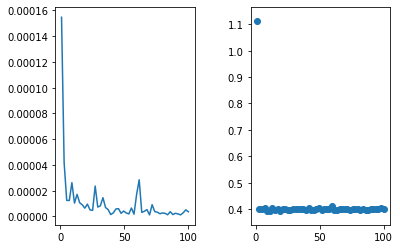

In [287]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig.add_subplot(1,2,1)
plt.plot(x,V)
#print(V)
fig.add_subplot(1,2,2)
plt.scatter(x,C)



#### Remarques:
 * Lorsque nu diverge (i.e la taille du bruit est relativement importante par rapport à celle de l'échantillon) le code semble se débloquer et le NCE a une variance chaotique.

### Cas 2: Loi du bruit"raisonnablement" distincte de celle de l'échantillon

In [138]:
### NCE 

mupo = 0.5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 


print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
grad=NCE_Adam(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=10, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)

print(" nbre d'itérations", len(grad.ctes))

true constant value 0.05699175434306182
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.2>
CTE3===== 0.10000013
CTE3===== -0.00012989342
CTE3===== -0.064047776
CTE3===== -0.11593569
CTE3===== -0.15966082
CTE3===== -0.19729613
CTE3===== -0.23010685
CTE3===== -0.25898388
CTE3===== -0.28457955
CTE3===== -0.30742663
CTE3===== -0.32786775
CTE3===== -0.3467923
CTE3===== -0.36382267
CTE3===== -0.37918153
CTE3===== -0.39319214
CTE3===== -0.4059713
CTE3===== -0.41754928
CTE3===== -0.4280427
CTE3===== -0.43752477
CTE3===== -0.446136
CTE3===== -0.45394906
CTE3===== -0.46104145
CTE3===== -0.46747935
CTE3===== -0.47332573
CTE3===== -0.4786329
CTE3===== -0.48345274
CTE3===== -0.48781458
CTE3===== -0.49177325
CTE3===== -0.49536276
CTE3===== -0.49860016
CTE3===== -0.5015147
CTE3===== -0.5041492
CTE3===== -0.50653064
CTE3===== -0.5086836
CTE3===== -0.5106354
CTE3===== -0.51237696
CTE3===== -0.5138846
CTE3===== -0.51523817
CTE3===== -0.51645046
CTE3===== -0.5175173
CTE3===== -0.5184681
CTE3===

CTE3===== -1.0302212
CTE3===== -1.0299393
CTE3===== -1.0296563
CTE3===== -1.0293859
CTE3===== -1.029092
CTE3===== -1.0288008
CTE3===== -1.0285099
CTE3===== -1.0282247
CTE3===== -1.0279471
CTE3===== -1.0270815
CTE3===== -1.026271
CTE3===== -1.025516
CTE3===== -1.0248115
CTE3===== -1.024147
CTE3===== -1.0236385
CTE3===== -1.0231262
CTE3===== -1.0226316
CTE3===== -1.0221628
CTE3===== -1.0216987
CTE3===== -1.0212538
CTE3===== -1.0208521
CTE3===== -1.0204608
CTE3===== -1.0200838
CTE3===== -1.0197592
CTE3===== -1.0194445
CTE3===== -1.0191343
CTE3===== -1.0188239
CTE3===== -1.0185224
CTE3===== -1.0182278
CTE3===== -1.0179483
CTE3===== -1.017664
CTE3===== -1.0173773
CTE3===== -1.0170885
CTE3===== -1.0167985
CTE3===== -1.0165093
CTE3===== -1.0162154
CTE3===== -1.0159255
CTE3===== -1.0156302
CTE3===== -1.0153291
CTE3===== -1.0150269
CTE3===== -1.0147355
CTE3===== -1.0144429
CTE3===== -1.0141476
CTE3===== -1.0138522
CTE3===== -1.0135568
CTE3===== -1.0132536
CTE3===== -1.0129683
CTE3===== -1.01267

CTE3===== -0.85320044
CTE3===== -0.8525963
CTE3===== -0.85201776
CTE3===== -0.8514474
CTE3===== -0.8509103
CTE3===== -0.8500232
CTE3===== -0.8492109
CTE3===== -0.8484434
CTE3===== -0.8484789
CTE3===== -0.8484457
CTE3===== -0.84834045
CTE3===== -0.8481787
CTE3===== -0.84798175
CTE3===== -0.8477396
CTE3===== -0.84746265
CTE3===== -0.8471493
CTE3===== -0.84681207
CTE3===== -0.84644866
CTE3===== -0.8459269
CTE3===== -0.8457376
CTE3===== -0.8455186
CTE3===== -0.8452457
CTE3===== -0.8449438
CTE3===== -0.84462166
CTE3===== -0.8443144
CTE3===== -0.84398705
CTE3===== -0.8436376
CTE3===== -0.8432822
CTE3===== -0.84290993
CTE3===== -0.84252006
CTE3===== -0.84208816
CTE3===== -0.8416507
CTE3===== -0.8411973
CTE3===== -0.8407365
CTE3===== -0.84025496
CTE3===== -0.8397691
CTE3===== -0.8392646
CTE3===== -0.8385808
CTE3===== -0.83790225
CTE3===== -0.8372768
CTE3===== -0.8366569
CTE3===== -0.83604234
CTE3===== -0.8354401
CTE3===== -0.8348466
CTE3===== -0.8342483
CTE3===== -0.83365226
CTE3===== -0.83305

CTE3===== -0.555619
CTE3===== -0.5544984
CTE3===== -0.5533795
CTE3===== -0.5522182
CTE3===== -0.55105937
CTE3===== -0.5499006
CTE3===== -0.5487411
CTE3===== -0.5475224
CTE3===== -0.5463116
CTE3===== -0.54516053
CTE3===== -0.5439925
CTE3===== -0.5428058
CTE3===== -0.5416061
CTE3===== -0.5404662
CTE3===== -0.5392936
CTE3===== -0.5382297
CTE3===== -0.53713864
CTE3===== -0.5360326
CTE3===== -0.5349074
CTE3===== -0.53404737
CTE3===== -0.5331726
CTE3===== -0.5323233
CTE3===== -0.5314234
CTE3===== -0.5304962
CTE3===== -0.5294888
CTE3===== -0.52845293
CTE3===== -0.5273069
CTE3===== -0.5261933
CTE3===== -0.5250626
CTE3===== -0.5240927
CTE3===== -0.5231237
CTE3===== -0.5222293
CTE3===== -0.5212908
CTE3===== -0.5203251
CTE3===== -0.5193405
CTE3===== -0.5183804
CTE3===== -0.51737314
CTE3===== -0.5163404
CTE3===== -0.51518595
CTE3===== -0.5140424
CTE3===== -0.5128692
CTE3===== -0.51175827
CTE3===== -0.5105999
CTE3===== -0.50951606
CTE3===== -0.50840765
CTE3===== -0.50723636
CTE3===== -0.5060025
CTE

CTE3===== -1.1663651
CTE3===== -1.1657029
CTE3===== -1.1650547
CTE3===== -1.164395
CTE3===== -1.1637391
CTE3===== -1.1630864
CTE3===== -1.1624092
CTE3===== -1.1617239
CTE3===== -1.161028
CTE3===== -1.160339
CTE3===== -1.159649
CTE3===== -1.1589686
CTE3===== -1.158294
CTE3===== -1.1576334
CTE3===== -1.1569712
CTE3===== -1.1563133
CTE3===== -1.1556695
CTE3===== -1.1550219
CTE3===== -1.1544092
CTE3===== -1.1537873
CTE3===== -1.1531605
CTE3===== -1.1525303
CTE3===== -1.1519037
CTE3===== -1.1513066
CTE3===== -1.1548731
CTE3===== -1.1580166
CTE3===== -1.1607189
CTE3===== -1.1630836
CTE3===== -1.1651535
CTE3===== -1.1669893
CTE3===== -1.1685845
CTE3===== -1.1699573
CTE3===== -1.171133
CTE3===== -1.172133
CTE3===== -1.1729274
CTE3===== -1.1735826
CTE3===== -1.1741295
CTE3===== -1.1744901
CTE3===== -1.1747417
CTE3===== -1.1749305
CTE3===== -1.1750343
CTE3===== -1.1750606
CTE3===== -1.175031
CTE3===== -1.1749371
CTE3===== -1.174791
CTE3===== -1.1745964
CTE3===== -1.1743832
CTE3===== -1.174132
CT

KeyboardInterrupt: 

In [244]:
#### Calcul variance NCE

mupo = 0.5
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 


x= np.linspace(1,100,num=50)

ctes=[]
C=[]
V=[]
for i in range(len(x)):
    
    for j in range(10):
        
        grad = NCEDescent(x_batches,mupo, sigmapo,mu_init = 0.5, sigma_init=1, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 200, nu =x[i])
        #print(grad.m0)
        ctes.append(grad.cte)
    
    C.append(np.mean(grad.cte))
    V.append(np.var(ctes))
    ctes = []
    
#print(ctes)




In [276]:
## Calcul histogramme NCE 

mupo = 0.5
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size))

H = []

for i in range (50):
    grad = NCEDescent(x_batches,mupo, sigmapo,mu_init = 0.5, sigma_init= 1, cte_init = 3, learning_rate = [0.01,0.01], max_iters = 500, nu = 1)
    H.append(grad.cte)

(array([4., 2., 4., 3., 5., 5., 9., 6., 6., 6.]),
 array([2.3958986 , 2.45601308, 2.51612755, 2.57624203, 2.6363565 ,
        2.69647098, 2.75658545, 2.81669993, 2.8768144 , 2.93692888,
        2.99704335]),
 <a list of 10 Patch objects>)

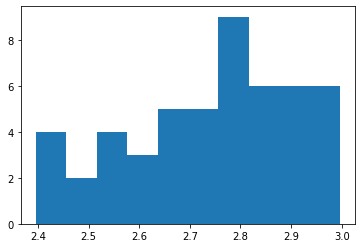

In [277]:
plt.hist(H)

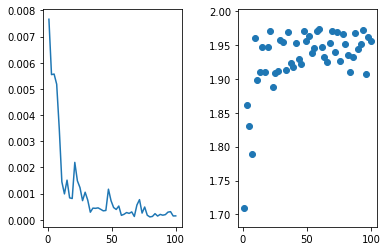

In [245]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig.add_subplot(1,2,1)
plt.plot(x,V)
#print(V)
fig.add_subplot(1,2,2)
plt.scatter(x,C)

#### Remarques:
 * On remarque que conformément au résultat théorique. Lorsque nu diverge vers $+\infty$ la variance du NCE diminue
 * L'estimateur ne semble pas biaisé d'après l'histogramme et variance relativement faible pour nu=1.

### CAS 3: Bruit Très similaire à l'échantillon

In [149]:
##NCE 

mupo = 4 #we take  mu_noise = 5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

grad=NCE_Adam(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=7, cte_init = 3, learning_rate = [0.01,0.01], max_iters = 1000)    
print("constant estimate",grad.cte)

print( " nombres d'iterations ", len(grad.ctes))

true constant value 0.05699175434306182
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
CTE3===== 2.600004
CTE3===== 2.1995134
CTE3===== 1.798336
CTE3===== 1.3965349
CTE3===== 0.9948518
CTE3===== 0.59550446
CTE3===== 0.20538396
CTE3===== -0.15533885
CTE3===== -0.0397724
CTE3===== -0.22377312
CTE3===== -0.37965888
CTE3===== -0.5156084
CTE3===== -0.6353338
CTE3===== -0.7412826
CTE3===== -0.83531183
CTE3===== -0.91889846
CTE3===== -0.99326247
CTE3===== -1.0594379
CTE3===== -1.1183043
CTE3===== -1.1706207
CTE3===== -1.2170519
CTE3===== -1.2581804
CTE3===== -1.2945222
CTE3===== -1.3265356
CTE3===== -1.3546288
CTE3===== -1.3791637
CTE3===== -1.4004667
CTE3===== -1.4188313
CTE3===== -1.4345206
CTE3===== -1.4477713
CTE3===== -1.4587989
CTE3===== -1.467794
CTE3===== -1.4749335
CTE3===== -1.4803743
CTE3===== -1.4842594
CTE3===== -1.4867151
CTE3===== -1.4878594
CTE3===== -1.4878005
CTE3===== -1.4866326
CTE3===== -1.48444
CTE3===== -1.4813013
CTE3===== -1.4772847
CTE3===== -1.4724549


CTE3===== 4.7321916
CTE3===== 4.73117
CTE3===== 4.7301474
CTE3===== 4.7291226
CTE3===== 4.728096
CTE3===== 4.727068
CTE3===== 4.726038
CTE3===== 4.725006
CTE3===== 4.723973
CTE3===== 4.7229376
CTE3===== 4.7219005
CTE3===== 4.720862
CTE3===== 4.7198215
CTE3===== 4.718779
CTE3===== 4.7177353
CTE3===== 4.7166896
CTE3===== 4.7156425
CTE3===== 4.7145934
CTE3===== 4.7135425
CTE3===== 4.7124896
CTE3===== 4.7114353
CTE3===== 4.710379
CTE3===== 4.709321
CTE3===== 4.7082615
CTE3===== 4.7072
CTE3===== 4.7061367
CTE3===== 4.705072
CTE3===== 4.7040052
CTE3===== 4.702937
CTE3===== 4.701867
CTE3===== 4.700795
CTE3===== 4.699722
CTE3===== 4.6986465
CTE3===== 4.6975694
CTE3===== 4.696491
CTE3===== 4.6954103
CTE3===== 4.694328
CTE3===== 4.693244
CTE3===== 4.692158
CTE3===== 4.6910706
CTE3===== 4.689981
CTE3===== 4.68889
CTE3===== 4.687797
CTE3===== 4.6867023
CTE3===== 4.685606
CTE3===== 4.684508
CTE3===== 4.6834083
CTE3===== 4.682307
CTE3===== 4.6812034
CTE3===== 4.680098
CTE3===== 4.6789913
CTE3===== 4

CTE3===== 4.136272
CTE3===== 4.134411
CTE3===== 4.132547
CTE3===== 4.1306806
CTE3===== 4.128812
CTE3===== 4.1269407
CTE3===== 4.125067
CTE3===== 4.1231914
CTE3===== 4.121313
CTE3===== 4.119432
CTE3===== 4.1175485
CTE3===== 4.1156626
CTE3===== 4.1137743
CTE3===== 4.111883
CTE3===== 4.1099896
CTE3===== 4.1080937
CTE3===== 4.1061954
CTE3===== 4.104295
CTE3===== 4.1023912
CTE3===== 4.1004853
CTE3===== 4.098577
CTE3===== 4.0966663
CTE3===== 4.094753
CTE3===== 4.092837
CTE3===== 4.0909185
CTE3===== 4.088998
CTE3===== 4.0870743
CTE3===== 4.0851483
CTE3===== 4.0832195
CTE3===== 4.0812883
CTE3===== 4.079355
CTE3===== 4.0774183
CTE3===== 4.0754795
CTE3===== 4.0735383
CTE3===== 4.071594
CTE3===== 4.069648
CTE3===== 4.0676985
CTE3===== 4.065747
CTE3===== 4.0637927
CTE3===== 4.061836
CTE3===== 4.0598764
CTE3===== 4.0579143
CTE3===== 4.055949
CTE3===== 4.053982
CTE3===== 4.052012
CTE3===== 4.0500393
CTE3===== 4.048064
CTE3===== 4.0460863
CTE3===== 4.044106
CTE3===== 4.042123
CTE3===== 4.0401373
CTE3

CTE3===== 3.089498
CTE3===== 3.0860994
CTE3===== 3.0826945
CTE3===== 3.079284
CTE3===== 3.0758674
CTE3===== 3.072445
CTE3===== 3.0690165
CTE3===== 3.065582
CTE3===== 3.0621414
CTE3===== 3.058695
CTE3===== 3.0552428
CTE3===== 3.0517843
CTE3===== 3.0483196
CTE3===== 3.044849
CTE3===== 3.041372
CTE3===== 3.037889
CTE3===== 3.0343995
CTE3===== 3.0309038
CTE3===== 3.027402
CTE3===== 3.023894
CTE3===== 3.02038
CTE3===== 3.0168595
CTE3===== 3.0133326
CTE3===== 3.0097995
CTE3===== 3.0062602
CTE3===== 3.002714
CTE3===== 2.999161
CTE3===== 2.995602
CTE3===== 2.9920366
CTE3===== 2.9884653
CTE3===== 2.9848874
CTE3===== 2.981303
CTE3===== 2.9777117
CTE3===== 2.974114
CTE3===== 2.97051
CTE3===== 2.9668992
CTE3===== 2.9632819
CTE3===== 2.959658
CTE3===== 2.9560275
CTE3===== 2.9523904
CTE3===== 2.9487464
CTE3===== 2.9450955
CTE3===== 2.9414377
CTE3===== 2.9377732
CTE3===== 2.9341018
CTE3===== 2.9304235
CTE3===== 2.9267385
CTE3===== 2.9230466
CTE3===== 2.9193478
CTE3===== 2.915642
CTE3===== 2.9119291
C

CTE3===== 0.33420807
CTE3===== 0.31044927
CTE3===== 0.2858481
CTE3===== 0.2603484
CTE3===== 0.23382704
CTE3===== 0.20625484
CTE3===== 0.17743748
CTE3===== 0.14727382
CTE3===== 0.11576897
CTE3===== 0.08318786
CTE3===== 0.05079463
CTE3===== 0.023124972
CTE3===== 0.024105111
CTE3===== 0.049364015
CTE3===== 0.07403707
CTE3===== 0.09394652
CTE3===== 0.10812335
CTE3===== 0.11681938
CTE3===== 0.12034505
CTE3===== 0.119245194
CTE3===== 0.11404551
CTE3===== 0.10508329
CTE3===== 0.09285265
CTE3===== 0.07808006
CTE3===== 0.061803132
CTE3===== 0.046351872
CTE3===== 0.03542471
CTE3===== 0.035006873
CTE3===== 0.044368494
CTE3===== 0.05701236
CTE3===== 0.06855069
CTE3===== 0.07698524
CTE3===== 0.081673585
CTE3===== 0.08269432
CTE3===== 0.08024798
CTE3===== 0.07520862
CTE3===== 0.06802754
CTE3===== 0.059653558
CTE3===== 0.05142915
CTE3===== 0.045629144
CTE3===== 0.044044662
CTE3===== 0.046701066
CTE3===== 0.05200754
CTE3===== 0.058180615
CTE3===== 0.063456744
CTE3===== 0.06705571
CTE3===== 0.06854358


CTE3===== 0.0566658
CTE3===== 0.056265235
CTE3===== 0.055980947
CTE3===== 0.056105234
CTE3===== 0.056484655
CTE3===== 0.05692633
CTE3===== 0.057078302
CTE3===== 0.057395387
CTE3===== 0.05778856
CTE3===== 0.057643633
CTE3===== 0.057211462
CTE3===== 0.05689545
CTE3===== 0.05648886
CTE3===== 0.056505837
CTE3===== 0.056655396
CTE3===== 0.05695281
CTE3===== 0.056976367
CTE3===== 0.057039637
CTE3===== 0.057048567
CTE3===== 0.056808304
CTE3===== 0.05654571
CTE3===== 0.056498695
CTE3===== 0.056520212
CTE3===== 0.057081718
CTE3===== 0.05740319
CTE3===== 0.057520166
CTE3===== 0.05748639
CTE3===== 0.057415687
CTE3===== 0.057276674
CTE3===== 0.056890734
CTE3===== 0.056553118
CTE3===== 0.056477826
CTE3===== 0.05621312
CTE3===== 0.05647196
CTE3===== 0.056676503
CTE3===== 0.057040878
CTE3===== 0.057256788
CTE3===== 0.05719792
CTE3===== 0.057406995
CTE3===== 0.05728113
CTE3===== 0.056850392
CTE3===== 0.056651022
CTE3===== 0.05647259
CTE3===== 0.05671196
CTE3===== 0.057043422
CTE3===== 0.05739272
CTE3=

CTE3===== 0.05683574
CTE3===== 0.057732087
CTE3===== 0.05827651
CTE3===== 0.05824962
CTE3===== 0.057713147
CTE3===== 0.056944758
CTE3===== 0.056461245
CTE3===== 0.05618653
CTE3===== 0.05611335
CTE3===== 0.05637952
CTE3===== 0.056542285
CTE3===== 0.056920934
CTE3===== 0.05715659
CTE3===== 0.05719707
CTE3===== 0.057095166
CTE3===== 0.056907047
CTE3===== 0.057153657
CTE3===== 0.05705249
CTE3===== 0.056861468
CTE3===== 0.05691947
CTE3===== 0.056941792
CTE3===== 0.057175547
CTE3===== 0.0571917
CTE3===== 0.057008397
CTE3===== 0.0567206
CTE3===== 0.056482382
CTE3===== 0.056703083
CTE3===== 0.056843024
CTE3===== 0.05657563
CTE3===== 0.056587443
CTE3===== 0.056695245
CTE3===== 0.0573711
CTE3===== 0.057675388
CTE3===== 0.05778334
CTE3===== 0.05747943
CTE3===== 0.057070993
CTE3===== 0.056893952
CTE3===== 0.05674204
CTE3===== 0.056473978
CTE3===== 0.056584332
CTE3===== 0.056585126
CTE3===== 0.057382762
CTE3===== 0.057998843
CTE3===== 0.05812433
CTE3===== 0.057508465
CTE3===== 0.056746516
CTE3=====

CTE3===== 0.05797831
CTE3===== 0.05824947
CTE3===== 0.057709944
CTE3===== 0.05683135
CTE3===== 0.05623387
CTE3===== 0.056225218
CTE3===== 0.05629931
CTE3===== 0.056660637
CTE3===== 0.057386555
CTE3===== 0.057710495
CTE3===== 0.058246147
CTE3===== 0.057971735
CTE3===== 0.057043403
CTE3===== 0.05608939
CTE3===== 0.055791367
CTE3===== 0.056226633
CTE3===== 0.05693698
CTE3===== 0.05746364
CTE3===== 0.057861935
CTE3===== 0.057898365
CTE3===== 0.057617057
CTE3===== 0.057224106
CTE3===== 0.056759935
CTE3===== 0.056472458
CTE3===== 0.056563724
CTE3===== 0.05696413
CTE3===== 0.05687556
CTE3===== 0.05650435
CTE3===== 0.056494925
CTE3===== 0.05665084
CTE3===== 0.057235423
CTE3===== 0.057749156
CTE3===== 0.057907764
CTE3===== 0.057323236
CTE3===== 0.05666165
CTE3===== 0.05630743
CTE3===== 0.056101616
CTE3===== 0.055808302
CTE3===== 0.055982534
CTE3===== 0.056774784
CTE3===== 0.057981066
CTE3===== 0.058471475
CTE3===== 0.058419116
CTE3===== 0.057627592
CTE3===== 0.056672525
CTE3===== 0.056430764
CT

CTE3===== 0.0568802
CTE3===== 0.056877427
CTE3===== 0.056828473
CTE3===== 0.056651067
CTE3===== 0.056381576
CTE3===== 0.05681241
CTE3===== 0.05690171
CTE3===== 0.056994025
CTE3===== 0.057252884
CTE3===== 0.057582807
CTE3===== 0.058407232
CTE3===== 0.058495577
CTE3===== 0.05785214
CTE3===== 0.056932308
CTE3===== 0.05611844
CTE3===== 0.05596533
CTE3===== 0.05618937
CTE3===== 0.056523845
CTE3===== 0.057012122
CTE3===== 0.05713944
CTE3===== 0.057610333
CTE3===== 0.057793427
CTE3===== 0.05723973
CTE3===== 0.056168426
CTE3===== 0.055527143
CTE3===== 0.0557069
CTE3===== 0.05652877
CTE3===== 0.05696691
CTE3===== 0.05723835
CTE3===== 0.05753637
CTE3===== 0.057736225
CTE3===== 0.057256218
CTE3===== 0.05650635
CTE3===== 0.055426452
CTE3===== 0.055184457
CTE3===== 0.055941485
CTE3===== 0.057096157
CTE3===== 0.057971574
CTE3===== 0.05824379
CTE3===== 0.057689704
CTE3===== 0.05676525
CTE3===== 0.055899832
CTE3===== 0.05545036
CTE3===== 0.055676483
CTE3===== 0.056512695
CTE3===== 0.057877153
CTE3====

CTE3===== 0.05698868
CTE3===== 0.05799433
CTE3===== 0.057886478
CTE3===== 0.056945525
CTE3===== 0.055887144
CTE3===== 0.056172498
CTE3===== 0.057470247
CTE3===== 0.058693826
CTE3===== 0.05821737
CTE3===== 0.05726588
CTE3===== 0.05562318
CTE3===== 0.055578854
CTE3===== 0.056765854
CTE3===== 0.05761765
CTE3===== 0.05780291
CTE3===== 0.057975445
CTE3===== 0.057576682
CTE3===== 0.057077963
CTE3===== 0.055890158
CTE3===== 0.055785283
CTE3===== 0.05587434
CTE3===== 0.057076506
CTE3===== 0.057927202
CTE3===== 0.057879873
CTE3===== 0.056877885
CTE3===== 0.056324583
CTE3===== 0.055955265
CTE3===== 0.05566392
CTE3===== 0.055597357
CTE3===== 0.05675182
CTE3===== 0.057713237
CTE3===== 0.05840914
CTE3===== 0.057971913
CTE3===== 0.05704114
CTE3===== 0.055449825
CTE3===== 0.05529676
CTE3===== 0.05633951
CTE3===== 0.057047334
CTE3===== 0.057083867
CTE3===== 0.057104927
CTE3===== 0.057243813
CTE3===== 0.057946175
CTE3===== 0.057968818
CTE3===== 0.05691363
CTE3===== 0.05556594
CTE3===== 0.0552364
CTE3==

CTE3===== 0.05830933
CTE3===== 0.058411453
CTE3===== 0.057097472
CTE3===== 0.05537148
CTE3===== 0.055595197
CTE3===== 0.056937464
CTE3===== 0.057855263
CTE3===== 0.057842635
CTE3===== 0.057128567
CTE3===== 0.056189284
CTE3===== 0.056212973
CTE3===== 0.056738615
CTE3===== 0.05752861
CTE3===== 0.057488274
CTE3===== 0.057645302
CTE3===== 0.05755477
CTE3===== 0.056504317
CTE3===== 0.055308208
CTE3===== 0.055979744
CTE3===== 0.057233438
CTE3===== 0.059263233
CTE3===== 0.059174564
CTE3===== 0.05712665
CTE3===== 0.05476542
CTE3===== 0.05389109
CTE3===== 0.055836443
CTE3===== 0.058619935
CTE3===== 0.05926512
CTE3===== 0.057544567
CTE3===== 0.055068236
CTE3===== 0.055317484
CTE3===== 0.056693565
CTE3===== 0.059205566
CTE3===== 0.059505966
CTE3===== 0.058345594
CTE3===== 0.056835573
CTE3===== 0.05498041
CTE3===== 0.054384004
CTE3===== 0.05588282
CTE3===== 0.05802458
CTE3===== 0.059914052
CTE3===== 0.059390623
CTE3===== 0.057027854
CTE3===== 0.053920057
CTE3===== 0.053871065
CTE3===== 0.056660812

CTE3===== 0.058365792
CTE3===== 0.05922866
CTE3===== 0.058524113
CTE3===== 0.05576752
CTE3===== 0.054944027
CTE3===== 0.05740919
CTE3===== 0.0581578
CTE3===== 0.05697487
CTE3===== 0.056570593
CTE3===== 0.056428727
CTE3===== 0.05740253
CTE3===== 0.058310673
CTE3===== 0.058352023
CTE3===== 0.057009492
CTE3===== 0.055702675
CTE3===== 0.056341153
CTE3===== 0.056694105
CTE3===== 0.056668602
CTE3===== 0.056824904
CTE3===== 0.057248857
CTE3===== 0.058651734
CTE3===== 0.05859028
CTE3===== 0.05716368
CTE3===== 0.05558256
CTE3===== 0.055980172
CTE3===== 0.057180732
CTE3===== 0.057379477
CTE3===== 0.0559181
CTE3===== 0.0557092
CTE3===== 0.056117445
CTE3===== 0.05839824
CTE3===== 0.05972321
CTE3===== 0.05743429
CTE3===== 0.054869913
CTE3===== 0.055135213
CTE3===== 0.057265922
CTE3===== 0.0584974
CTE3===== 0.058398668
CTE3===== 0.05725745
CTE3===== 0.05581746
CTE3===== 0.056423213
CTE3===== 0.058110807
CTE3===== 0.058738165
CTE3===== 0.057108466
CTE3===== 0.055567045
CTE3===== 0.05626013
CTE3===== 

CTE3===== 0.059923187
CTE3===== 0.058386646
CTE3===== 0.05534082
CTE3===== 0.053410746
CTE3===== 0.056241453
CTE3===== 0.059879072
CTE3===== 0.05920798
CTE3===== 0.054880954
CTE3===== 0.053993497
CTE3===== 0.056946147
CTE3===== 0.060495667
CTE3===== 0.059835155
CTE3===== 0.056692302
CTE3===== 0.053336125
CTE3===== 0.05531594
CTE3===== 0.05910415
CTE3===== 0.059302833
CTE3===== 0.056703746
CTE3===== 0.055302348
CTE3===== 0.054908685
CTE3===== 0.058978707
CTE3===== 0.06003228
CTE3===== 0.05854944
CTE3===== 0.05527352
CTE3===== 0.054637555
CTE3===== 0.05778956
CTE3===== 0.058920123
CTE3===== 0.056389127
CTE3===== 0.054720696
CTE3===== 0.055987727
CTE3===== 0.058363494
CTE3===== 0.058687054
CTE3===== 0.057254296
CTE3===== 0.05506584
CTE3===== 0.055295177
CTE3===== 0.058384135
CTE3===== 0.05879259
CTE3===== 0.056766715
CTE3===== 0.056289814
CTE3===== 0.055917885
CTE3===== 0.057843924
CTE3===== 0.058125798
CTE3===== 0.057703078
CTE3===== 0.056778133
CTE3===== 0.057209432
CTE3===== 0.05764141

CTE3===== 0.061181065
CTE3===== 0.056754507
CTE3===== 0.05309444
CTE3===== 0.05523659
CTE3===== 0.05992042
CTE3===== 0.0605155
CTE3===== 0.056575418
CTE3===== 0.05231388
CTE3===== 0.054759473
CTE3===== 0.059854783
CTE3===== 0.06265216
CTE3===== 0.058200326
CTE3===== 0.053045698
CTE3===== 0.05403121
CTE3===== 0.059146132
CTE3===== 0.062316068
CTE3===== 0.058563083
CTE3===== 0.05136739
CTE3===== 0.054214995
CTE3===== 0.059587732
CTE3===== 0.062154986
CTE3===== 0.057317145
CTE3===== 0.0516562
CTE3===== 0.054570187
CTE3===== 0.0611106
CTE3===== 0.063040905
CTE3===== 0.057405025
CTE3===== 0.05057407
CTE3===== 0.05595977
CTE3===== 0.062728636
CTE3===== 0.062105622
CTE3===== 0.054563742
CTE3===== 0.052028984
CTE3===== 0.057357717
CTE3===== 0.06187254
CTE3===== 0.060828052
CTE3===== 0.054748666
CTE3===== 0.05221937
CTE3===== 0.058199827
CTE3===== 0.061723538
CTE3===== 0.060413137
CTE3===== 0.055114124
CTE3===== 0.05269435
CTE3===== 0.058303133
CTE3===== 0.061821207
CTE3===== 0.060005095
CTE3==

CTE3===== 0.05696544
CTE3===== 0.055599682
CTE3===== 0.05707192
CTE3===== 0.0576547
CTE3===== 0.05924837
CTE3===== 0.057199284
CTE3===== 0.054063536
CTE3===== 0.05728818
CTE3===== 0.058708407
CTE3===== 0.057608444
CTE3===== 0.055590983
CTE3===== 0.05654605
CTE3===== 0.057390656
CTE3===== 0.057280615
CTE3===== 0.05774397
CTE3===== 0.055697408
CTE3===== 0.055569522
CTE3===== 0.057831284
CTE3===== 0.057972305
CTE3===== 0.058429614
CTE3===== 0.055998564
CTE3===== 0.056090042
CTE3===== 0.05732297
CTE3===== 0.05861
CTE3===== 0.057080105
CTE3===== 0.053889636
CTE3===== 0.05581009
CTE3===== 0.059977945
CTE3===== 0.05891931
CTE3===== 0.05556109
CTE3===== 0.055116985
CTE3===== 0.058560114
CTE3===== 0.058814038
CTE3===== 0.05652578
CTE3===== 0.056890056
CTE3===== 0.056284234
CTE3===== 0.056744553
CTE3===== 0.058461506
CTE3===== 0.057305947
CTE3===== 0.056361087
CTE3===== 0.055439696
CTE3===== 0.057586383
CTE3===== 0.057405446
CTE3===== 0.056949537
CTE3===== 0.056908973
CTE3===== 0.056434866
CTE3=

CTE3===== 0.052880727
CTE3===== 0.057866666
CTE3===== 0.06032212
CTE3===== 0.056793272
CTE3===== 0.055716414
CTE3===== 0.05680702
CTE3===== 0.056379877
CTE3===== 0.057369795
CTE3===== 0.05704217
CTE3===== 0.05839581
CTE3===== 0.056351073
CTE3===== 0.05509487
CTE3===== 0.056625318
CTE3===== 0.059238724
CTE3===== 0.057799418
CTE3===== 0.054039188
CTE3===== 0.05675645
CTE3===== 0.060023647
CTE3===== 0.058469325
CTE3===== 0.057431396
CTE3===== 0.055347346
CTE3===== 0.056689646
CTE3===== 0.0591857
CTE3===== 0.057365928
CTE3===== 0.05482853
CTE3===== 0.056637336
CTE3===== 0.05791488
CTE3===== 0.059080012
CTE3===== 0.056290723
CTE3===== 0.055374287
CTE3===== 0.058622632
CTE3===== 0.058445256
CTE3===== 0.056073062
CTE3===== 0.05714512
CTE3===== 0.058950476
CTE3===== 0.056301787
CTE3===== 0.054460786
CTE3===== 0.058458462
CTE3===== 0.05954941
CTE3===== 0.057374105
CTE3===== 0.053585663
CTE3===== 0.05778192
CTE3===== 0.060195435
CTE3===== 0.05611877
CTE3===== 0.054966096
CTE3===== 0.057396892
CT

CTE3===== 0.055212267
CTE3===== 0.05941071
CTE3===== 0.059149835
CTE3===== 0.053615283
CTE3===== 0.0553488
CTE3===== 0.059858825
CTE3===== 0.057550754
CTE3===== 0.056503985
CTE3===== 0.057315007
CTE3===== 0.058075346
CTE3===== 0.05603411
CTE3===== 0.055519875
CTE3===== 0.058417547
CTE3===== 0.05519872
CTE3===== 0.055493634
CTE3===== 0.061418243
CTE3===== 0.056307137
CTE3===== 0.055433672
CTE3===== 0.056381952
CTE3===== 0.05896776
CTE3===== 0.053611886
CTE3===== 0.059103083
CTE3===== 0.060695663
CTE3===== 0.05284717
CTE3===== 0.056468323
CTE3===== 0.062015697
CTE3===== 0.055346493
CTE3===== 0.05547162
CTE3===== 0.06024422
CTE3===== 0.056145333
CTE3===== 0.053314574
CTE3===== 0.060013853
CTE3===== 0.060269147
CTE3===== 0.052411895
CTE3===== 0.05597929
CTE3===== 0.061633706
CTE3===== 0.05817315
CTE3===== 0.052738413
CTE3===== 0.058969975
CTE3===== 0.060300723
CTE3===== 0.052017227
CTE3===== 0.05868199
CTE3===== 0.061380327
CTE3===== 0.05475397
CTE3===== 0.054057922
CTE3===== 0.062049404
C

CTE3===== -12.481307
CTE3===== -12.479287
CTE3===== -12.477185
CTE3===== -12.475009
CTE3===== -12.472766
CTE3===== -12.470462
CTE3===== -12.468103
CTE3===== -12.465695
CTE3===== -12.463243
CTE3===== -12.46075
CTE3===== -12.4582205
CTE3===== -12.455658
CTE3===== -12.453065
CTE3===== -12.450445
CTE3===== -12.447801
CTE3===== -12.445133
CTE3===== -12.442446
CTE3===== -12.439739
CTE3===== -12.4370165
CTE3===== -12.434278
CTE3===== -12.431524
CTE3===== -12.428759
CTE3===== -12.425981
CTE3===== -12.423192
CTE3===== -12.420393
CTE3===== -12.417585
CTE3===== -12.414769
CTE3===== -12.411945
CTE3===== -12.409114
CTE3===== -12.406276
CTE3===== -12.403431
CTE3===== -12.40058
CTE3===== -12.397724
CTE3===== -12.394863
CTE3===== -12.391997
CTE3===== -12.389127
CTE3===== -12.386251
CTE3===== -12.383372
CTE3===== -12.380489
CTE3===== -12.377603
CTE3===== -12.374712
CTE3===== -12.371818
CTE3===== -12.36892
CTE3===== -12.366019
CTE3===== -12.363115
CTE3===== -12.3602085
CTE3===== -12.357299
CTE3===== -12

CTE3===== -11.204692
CTE3===== -11.200866
CTE3===== -11.197036
CTE3===== -11.193203
CTE3===== -11.189366
CTE3===== -11.185527
CTE3===== -11.1816845
CTE3===== -11.177838
CTE3===== -11.173989
CTE3===== -11.170136
CTE3===== -11.166281
CTE3===== -11.162422
CTE3===== -11.15856
CTE3===== -11.154695
CTE3===== -11.1508255
CTE3===== -11.146954
CTE3===== -11.143078
CTE3===== -11.139199
CTE3===== -11.135317
CTE3===== -11.131432
CTE3===== -11.127543
CTE3===== -11.1236515
CTE3===== -11.119757
CTE3===== -11.115858
CTE3===== -11.111957
CTE3===== -11.108051
CTE3===== -11.104143
CTE3===== -11.100231
CTE3===== -11.096316
CTE3===== -11.092398
CTE3===== -11.088476
CTE3===== -11.084551
CTE3===== -11.080623
CTE3===== -11.076691
CTE3===== -11.072756
CTE3===== -11.068817
CTE3===== -11.064876
CTE3===== -11.06093
CTE3===== -11.056981
CTE3===== -11.053029
CTE3===== -11.049073
CTE3===== -11.0451145
CTE3===== -11.041152
CTE3===== -11.037187
CTE3===== -11.033217
CTE3===== -11.029244
CTE3===== -11.025269
CTE3===== -

CTE3===== -9.370145
CTE3===== -9.364562
CTE3===== -9.358973
CTE3===== -9.353377
CTE3===== -9.347775
CTE3===== -9.342168
CTE3===== -9.336554
CTE3===== -9.330934
CTE3===== -9.325307
CTE3===== -9.3196745
CTE3===== -9.314035
CTE3===== -9.308391
CTE3===== -9.302739
CTE3===== -9.297082
CTE3===== -9.291418
CTE3===== -9.285748
CTE3===== -9.280071
CTE3===== -9.274388
CTE3===== -9.2687
CTE3===== -9.263004
CTE3===== -9.257302
CTE3===== -9.251595
CTE3===== -9.24588
CTE3===== -9.24016
CTE3===== -9.234433
CTE3===== -9.2287
CTE3===== -9.2229595
CTE3===== -9.217214
CTE3===== -9.211461
CTE3===== -9.205702
CTE3===== -9.199936
CTE3===== -9.194164
CTE3===== -9.188386
CTE3===== -9.182601
CTE3===== -9.176809
CTE3===== -9.171011
CTE3===== -9.165206
CTE3===== -9.159394
CTE3===== -9.153577
CTE3===== -9.147753
CTE3===== -9.141922
CTE3===== -9.136085
CTE3===== -9.13024
CTE3===== -9.12439
CTE3===== -9.118532
CTE3===== -9.112668
CTE3===== -9.106797
CTE3===== -9.10092
CTE3===== -9.095036
CTE3===== -9.089144
CTE3===

CTE3===== -6.3652678
CTE3===== -6.3552155
CTE3===== -6.3451424
CTE3===== -6.335048
CTE3===== -6.3249335
CTE3===== -6.314798
CTE3===== -6.304641
CTE3===== -6.294462
CTE3===== -6.284262
CTE3===== -6.2740407
CTE3===== -6.263798
CTE3===== -6.253534
CTE3===== -6.2432475
CTE3===== -6.2329392
CTE3===== -6.2226095
CTE3===== -6.2122574
CTE3===== -6.201883
CTE3===== -6.191486
CTE3===== -6.1810665
CTE3===== -6.1706247
CTE3===== -6.1601605
CTE3===== -6.1496735
CTE3===== -6.1391635
CTE3===== -6.1286306
CTE3===== -6.118075
CTE3===== -6.1074963
CTE3===== -6.0968943
CTE3===== -6.086268
CTE3===== -6.0756183
CTE3===== -6.064945
CTE3===== -6.0542483
CTE3===== -6.043527
CTE3===== -6.032782
CTE3===== -6.0220127
CTE3===== -6.0112195
CTE3===== -6.000401
CTE3===== -5.989558
CTE3===== -5.97869
CTE3===== -5.9677978
CTE3===== -5.95688
CTE3===== -5.945937
CTE3===== -5.934969
CTE3===== -5.923975
CTE3===== -5.9129558
CTE3===== -5.901911
CTE3===== -5.89084
CTE3===== -5.8797436
CTE3===== -5.868621
CTE3===== -5.857471

CTE3===== -12.705662
CTE3===== -12.705614
CTE3===== -12.70556
CTE3===== -12.705499
CTE3===== -12.705432
CTE3===== -12.705359
CTE3===== -12.705282
CTE3===== -12.7052
CTE3===== -12.705114
CTE3===== -12.705025
CTE3===== -12.704932
CTE3===== -12.704837
CTE3===== -12.704739
CTE3===== -12.7046385
CTE3===== -12.7045355
CTE3===== -12.704431
CTE3===== -12.704325
CTE3===== -12.704217
CTE3===== -12.704107
CTE3===== -12.703997
CTE3===== -12.703885
CTE3===== -12.703773
CTE3===== -12.703659
CTE3===== -12.703545
CTE3===== -12.703429
CTE3===== -12.703313
CTE3===== -12.703197
CTE3===== -12.703079
CTE3===== -12.702961
CTE3===== -12.702843
CTE3===== -12.7027235
CTE3===== -12.702604
CTE3===== -12.702485
CTE3===== -12.702365
CTE3===== -12.702245
CTE3===== -12.702125
CTE3===== -12.7020035
CTE3===== -12.701882
CTE3===== -12.701761
CTE3===== -12.70164
CTE3===== -12.701518
CTE3===== -12.701396
CTE3===== -12.701274
CTE3===== -12.701152
CTE3===== -12.70103
CTE3===== -12.700907
CTE3===== -12.700784
CTE3===== -12.

CTE3===== -12.653943
CTE3===== -12.653795
CTE3===== -12.653647
CTE3===== -12.6535
CTE3===== -12.653352
CTE3===== -12.653204
CTE3===== -12.653056
CTE3===== -12.652908
CTE3===== -12.6527605
CTE3===== -12.652613
CTE3===== -12.652465
CTE3===== -12.652317
CTE3===== -12.652169
CTE3===== -12.652021
CTE3===== -12.651873
CTE3===== -12.651724
CTE3===== -12.651575
CTE3===== -12.651426
CTE3===== -12.651278
CTE3===== -12.651129
CTE3===== -12.65098
CTE3===== -12.650831
CTE3===== -12.650682
CTE3===== -12.650534
CTE3===== -12.650385
CTE3===== -12.650236
CTE3===== -12.650086
CTE3===== -12.649937
CTE3===== -12.649787
CTE3===== -12.649637
CTE3===== -12.6494875
CTE3===== -12.649338
CTE3===== -12.649188
CTE3===== -12.649038
CTE3===== -12.648889
CTE3===== -12.648739
CTE3===== -12.648589
CTE3===== -12.648439
CTE3===== -12.64829
CTE3===== -12.648139
CTE3===== -12.647988
CTE3===== -12.647838
CTE3===== -12.647687
CTE3===== -12.647536
CTE3===== -12.647386
CTE3===== -12.647235
CTE3===== -12.647084
CTE3===== -12.6

CTE3===== -12.589789
CTE3===== -12.589609
CTE3===== -12.589429
CTE3===== -12.589249
CTE3===== -12.589068
CTE3===== -12.588888
CTE3===== -12.588707
CTE3===== -12.588526
CTE3===== -12.588345
CTE3===== -12.588163
CTE3===== -12.587982
CTE3===== -12.587801
CTE3===== -12.58762
CTE3===== -12.587439
CTE3===== -12.587257
CTE3===== -12.587076
CTE3===== -12.586894
CTE3===== -12.586712
CTE3===== -12.58653
CTE3===== -12.586348
CTE3===== -12.586165
CTE3===== -12.585983
CTE3===== -12.585801
CTE3===== -12.585619
CTE3===== -12.585437
CTE3===== -12.585255
CTE3===== -12.585072
CTE3===== -12.584888
CTE3===== -12.584705
CTE3===== -12.584522
CTE3===== -12.584339
CTE3===== -12.584156
CTE3===== -12.583973
CTE3===== -12.58379
CTE3===== -12.583607
CTE3===== -12.583424
CTE3===== -12.58324
CTE3===== -12.5830555
CTE3===== -12.582871
CTE3===== -12.582687
CTE3===== -12.582503
CTE3===== -12.582319
CTE3===== -12.582135
CTE3===== -12.581951
CTE3===== -12.581767
CTE3===== -12.581583
CTE3===== -12.581398
CTE3===== -12.58

CTE3===== -12.511471
CTE3===== -12.5112505
CTE3===== -12.511029
CTE3===== -12.510808
CTE3===== -12.510587
CTE3===== -12.5103655
CTE3===== -12.510144
CTE3===== -12.509923
CTE3===== -12.509702
CTE3===== -12.50948
CTE3===== -12.509258
CTE3===== -12.509036
CTE3===== -12.508814
CTE3===== -12.508592
CTE3===== -12.508369
CTE3===== -12.508147
CTE3===== -12.507925
CTE3===== -12.507703
CTE3===== -12.50748
CTE3===== -12.5072565
CTE3===== -12.507033
CTE3===== -12.50681
CTE3===== -12.506587
CTE3===== -12.506364
CTE3===== -12.506141
CTE3===== -12.505918
CTE3===== -12.505693
CTE3===== -12.505469
CTE3===== -12.505245
CTE3===== -12.505021
CTE3===== -12.504797
CTE3===== -12.504573
CTE3===== -12.504349
CTE3===== -12.504125
CTE3===== -12.503901
CTE3===== -12.503675
CTE3===== -12.50345
CTE3===== -12.503225
CTE3===== -12.503
CTE3===== -12.502775
CTE3===== -12.50255
CTE3===== -12.502325
CTE3===== -12.5021
CTE3===== -12.501874
CTE3===== -12.501648
CTE3===== -12.501422
CTE3===== -12.501196
CTE3===== -12.50097


CTE3===== -12.415242
CTE3===== -12.414971
CTE3===== -12.4147005
CTE3===== -12.41443
CTE3===== -12.414159
CTE3===== -12.413887
CTE3===== -12.413615
CTE3===== -12.413343
CTE3===== -12.413072
CTE3===== -12.4128
CTE3===== -12.412528
CTE3===== -12.412256
CTE3===== -12.4119835
CTE3===== -12.411711
CTE3===== -12.411438
CTE3===== -12.411165
CTE3===== -12.4108925
CTE3===== -12.41062
CTE3===== -12.410346
CTE3===== -12.410072
CTE3===== -12.409799
CTE3===== -12.409525
CTE3===== -12.409251
CTE3===== -12.4089775
CTE3===== -12.408704
CTE3===== -12.408429
CTE3===== -12.4081545
CTE3===== -12.40788
CTE3===== -12.407605
CTE3===== -12.4073305
CTE3===== -12.407056
CTE3===== -12.406781
CTE3===== -12.406506
CTE3===== -12.40623
CTE3===== -12.405954
CTE3===== -12.405679
CTE3===== -12.405403
CTE3===== -12.405128
CTE3===== -12.404851
CTE3===== -12.404574
CTE3===== -12.404298
CTE3===== -12.404021
CTE3===== -12.403745
CTE3===== -12.403468
CTE3===== -12.403192
CTE3===== -12.402914
CTE3===== -12.402637
CTE3===== -12

In [258]:
##NCE Variance en fonction de nu
mupo = 0.5
sigmapo = 1
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 


x= np.linspace(1,100,num=50)

ctes=[]
C=[]
V=[]

for i in range(len(x)):
    
    for j in range(10):
        
        grad = NCEDescent(x_batches,mupo, sigmapo,mu_init = 5, sigma_init= 7, cte_init = 3, learning_rate = [0.01,0.01], max_iters = 200, nu =x[i])
        #print(grad.m0)
        ctes.append(grad.cte)
    
    C.append(np.mean(grad.cte))
    V.append(np.var(ctes))
    ctes = []
    
#print(ctes)


In [274]:
#### Préparation Histogramme de la constante pour nu=1, m_data= 0.5, s_data = 1, m_noise=5, s_noise=7

mupo = 0.5
sigmapo = 1
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size))

H = []

for i in range (50):
    grad = NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init= 7, cte_init = 3, learning_rate = [0.01,0.01], max_iters = 500, nu = 1)
    H.append(grad.cte)


(array([30.,  8.,  6.,  0.,  1.,  2.,  1.,  1.,  0.,  1.]),
 array([0.39457736, 0.41046283, 0.42634829, 0.44223375, 0.45811922,
        0.47400468, 0.48989014, 0.50577561, 0.52166107, 0.53754653,
        0.553432  ]),
 <a list of 10 Patch objects>)

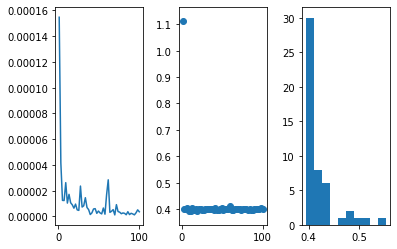

In [275]:
## plot:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

fig.add_subplot(1,3,1)
plt.plot(x,V)
#print(V)
fig.add_subplot(1,3,2)
plt.scatter(x,C)
fig.add_subplot(1,3,3)
plt.hist(H)


#### Remarques: Loi du bruit modérément éloignée de la distribution initiale
 * On remarque que conformément au résultat théorique. Lorsque nu diverge vers $+\infty$ la variance du NCE diminue
 * L'estimateur ne semble pas biaisé d'après l'histogramme et variance relativement faible pour nu=1.
 

## GAN for estimation of a 1D density

Generator is given by $G(z) = \mu + \sigma*z$ with$z ~ N(0,1)$



In [118]:
def GANDescent1D(x_batches, m, s,mu_init , sigma_init, cte_init , learning_rate = [0.01,0.01], max_iters = 500, nu=1):    
    
    m0 = mu_init 
    s0 =sigma_init
    cte = cte_init
    
    error_mu = [] 
    error_sigma = []
    error_cte = [] 
    
    mus = [m0]
    sigmas = [s0]
    ctes = [cte]

    batch_size= len(x_batches[0])
     
    for itr in range(max_iters): 
        
        for x in x_batches:
            
            z= random.normal( 0, 1, int(batch_size)) 
            q = m0+s0*z
            
            #Gradient in respect to the constant
            grad_cte = np.sum( 1/cte - pm0(x,m,s)/(cte*pm0(x,m,s)+ pn(x, m0,s0)) )/batch_size - (1/ batch_size)*np.sum( pm0(q,m,s)/(cte*pm0(q,m,s)+ pn(q,m0,s0)) )
            cte = cte + learning_rate[0] * grad_cte
            error_cte.append( (grad_cte) ) 
            

            #Gradient in respect to noise parameters
           
            grad_mu = -(q-m0)/s0**2 +((q-m0)*norm.pdf(q, m0, s0)/s0**2 + 
                        (q-m)*cte*exp(-0.5*((q-m)/s)**2)/s**2)/(cte*pm0(q,m,s) + norm.pdf(q,m0,s0))
            grad_sigma = grad_mu*z
            
            grad_mu = np.sum(grad_mu)/batch_size
            grad_sigma = np.sum(grad_sigma)/batch_size
            
            m0 = m0 - learning_rate[1] * grad_mu
            s0 = s0 - learning_rate[1] * grad_sigma
            
            error_mu.append( (grad_mu) ) 
            error_sigma.append((grad_sigma))
            
            ctes.append(cte)
            mus.append(m0)
            sigmas.append(s0)
            
            if ( abs(ctes[-1] - ctes[-2]) < 1e-6 and abs(mus[-1]-mus[-2])<1e-6 and abs(sigmas[-1]-sigmas[-2])<1e-6):
                return Gradient(cte,m0,s0, error_mu,error_sigma, error_cte, ctes,mus,sigmas)
            
  
    result = Gradient(cte,m0,s0, error_mu,error_sigma, error_cte, ctes,mus,sigmas)
    return result

### Lets experiment GAN with different values of  $𝜇_{𝑑𝑎𝑡𝑎},𝜎_{𝑑𝑎𝑡𝑎},𝜇_{𝑛𝑜𝑖𝑠𝑒},𝜎_{𝑛𝑜𝑖𝑠𝑒}$

In [119]:
mupo = 24
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

print("#########  With good learning rate for gen parameters ########")

grad=GANDescent(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=0.2, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
print("mu generaor ",grad.mu)
print("sigma generaor ",grad.sigma)

print("\n #########  With bad learning rate for gen parameters #######")

grad=GANDescent(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=0.2, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
print("mu generaor ",grad.mu)
print("sigma generaor ",grad.sigma)



#########  With good learning rate for gen parameters ########
constant estimate 0.05718726695818849
true constant value 0.05699175434306182
mu generaor  22.900370186724746
sigma generaor  7.315009227905055

 #########  With bad learning rate for gen parameters #######
constant estimate 0.05991599842635707
true constant value 0.05699175434306182
mu generaor  6.16909022462597
sigma generaor  3.128074757168202


In [120]:
mupo = 24
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

### Problemes numeriques !!!!

grad=GANDescent(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=1, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 800)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
print("mu generaor ",grad.mu)
print("sigma generaor ",grad.sigma)


constant estimate 0.2
true constant value 1.9947114020071635
mu generaor  5.0
sigma generaor  1.0


In [61]:
grad.error_cte[1]

2.575717417130363e-16

In [63]:
pm0(mupo,mupo,sigmapo)

1.0

In [121]:
mupo = 0.5
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=GANDescent(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=1, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 800)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
print("mu generaor ",grad.mu)
print("sigma generaor ",grad.sigma)


constant estimate 1.9925100968012672
true constant value 1.9947114020071635
mu generaor  0.49394169567182905
sigma generaor  0.17340442923055405


### Plots and  Numerical Experiments

In [134]:
mupo = 5
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

l=50
MU = np.linspace(-10 , 10, num=l)

nces = np.ones(l)

for i in range(l):
    grad=GANDescent(x_batches,mupo, sigmapo,mu_init = MU[i], sigma_init= sigmapo, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 500)    
    nces[i]= grad.cte
    


-10.0


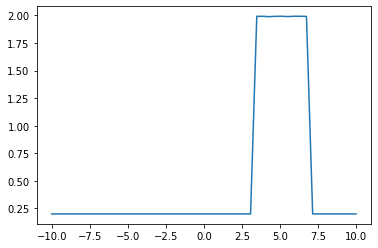

In [89]:
plt.plot(MU, nces)

In [96]:
mupo = 5
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

l=200
MU = np.linspace(-10 , 10, num=l)
nces1 = np.ones(l)

for i in range(l):
    grad=NCEDescent(x_batches,mupo, sigmapo,mu_init = MU[i], sigma_init= sigmapo, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 500)    

    nces1[i]= grad.cte
    


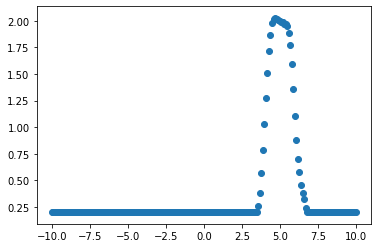

In [97]:
plt.scatter(MU, nces1)
#plt.hist( nces1)

In [31]:
mupo = 24
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 24, sigma_init=0.2, cte_init = 0.2, learning_rate = 0.01, max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

constant estimate 1.9936533306651985
true constant value 1.9947114020071635


In [32]:
mupo = 0.5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 0.5, sigma_init=7, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

constant estimate 0.05699175434306183
true constant value 0.05699175434306182


In [34]:
mupo = 0.5 #we take  mu_noise = 5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=7, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

constant estimate 0.055183661739152234
true constant value 0.05699175434306182


In [35]:
mupo = 0.5 #we take  mu_noise = 5
sigmapo = 7 #we take sigma_noise  = 5
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=5, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

constant estimate 0.06259480254408845
true constant value 0.05699175434306182


In [18]:
cte = 1/(sqrt(2*pi)*0.2)
cte

1.9947114020071635